In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import os
import matplotlib.pyplot as plt

print(os.listdir("../input"))

['final-bought-dataset.csv']


In [2]:
bought_df = pd.read_csv('../input/final-bought-dataset.csv')
bought_df.head()

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
0,11,214717089,784,65.33,385,12,0.157778,1,385,3,3,1,2,0,0,0.27,0
1,11,214743335,784,65.33,385,12,0.157778,1,43,3,3,1,2,0,0,0.07,0
2,11,214563337,784,65.33,385,12,0.157778,1,27,3,3,1,2,0,0,0.02,0
3,11,214819762,784,65.33,385,12,0.157778,1,20,3,3,1,2,0,1,0.13,0
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,0


In [3]:
len(bought_df), len(bought_df[bought_df['purchased']==1]), len(bought_df[bought_df['purchased']==0])

(2314687, 1049817, 1264870)

In [4]:
df = pd.DataFrame(bought_df)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['purchased'], axis=1)
y = df[['purchased']]
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30)
X_test, X_validate, y_test, y_validate  = train_test_split(X_test_val, y_test_val, test_size=0.50)
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((1620280, 16),
 (347204, 16),
 (347203, 16),
 (1620280, 1),
 (347204, 1),
 (347203, 1))

In [6]:
## Random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_validate)

In [7]:
from sklearn.metrics import roc_curve, auc, accuracy_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_validate, y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Validation set metrics:-")
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_validate))

Validation set metrics:-
roc_auc 0.7596930914772688
accuracy_score 0.7661893296160183


In [8]:
y_pred = model.predict(X_test)

Test data metrics:-


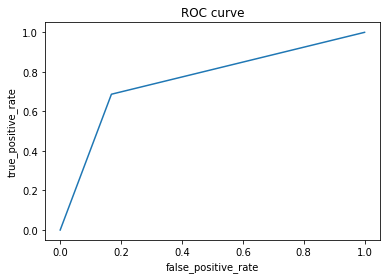

roc_auc 0.7593105789768534
accuracy_score 0.7660878506234106


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test.values.ravel(), y_score=y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("Test data metrics:-")
plt.title("ROC curve")
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.plot(false_positive_rate,true_positive_rate)

plt.show() 
print("roc_auc", roc_auc)
print("accuracy_score", accuracy_score(y_pred, y_test))

In [10]:
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['purchased'])
what_to_buy_df = pd.merge(X_test, y_pred, left_index=True, right_index=True)
what_to_buy_df.head(3)

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
1193675,6070787,214531513,2535,181.07,468,14,0.421667,2,316,6,6,1,2,0,0,0.25,0
491269,2561659,214821369,1540,81.05,584,19,0.247000,1,268,2,2,1,2,0,1,0.41,1
1070696,5510732,214748336,550,78.57,148,7,0.371429,1,148,6,6,1,2,0,1,0.32,0


In [11]:
unique_sid = what_to_buy_df['session'].unique()

fp = open("solution.dat","w")

for sid in unique_sid:
#     all_items = what_to_buy_df['session'==sid , 'item']
    bought_items = what_to_buy_df.loc[(what_to_buy_df['session']==sid) & (what_to_buy_df['purchased']==1), 'item'].values
    if len(bought_items)>0:
        items = ','.join(map(str, bought_items))
        print(f"{sid};{items}") 
        
        print(f"{sid};{','.join(map(str, bought_items))}", file=fp) 

        
fp.close()


2561659;214821369,214537490,214820392
9918088;214855582
4614497;214534667
527732;214826876,214821401
5779426;214533020
3680147;214842480
1718663;214820392
5644522;214845587,214844396,214846061
3298524;214829885
9465762;214859062
9991298;214854065
213587;214827013
8201397;214573350
10766987;214851159
2727729;214829012
4437409;214537490
8123423;214849132
2167114;214834873
9486522;214850942
6407452;214848596,214848847
6029578;214850900,214602377,214851172
5176759;214845806
710941;214821302
4608627;214839913,214710152
10553224;214685621
6438479;214563262
9254287;214853454
6360338;214845590,214835064
5480298;214725508,214844370
9714021;214839339,214574777
10126849;214853767
9713003;214854022
9337304;214850945
5985467;214644650
1352957;214687867
221121;214716932
4793949;214845127
2201563;214829042
6561068;214837260,214652975
6524361;214848605
6011584;214848605
214492;214821290
6866341;214849134
8911504;214853128
6063756;214832143
4931598;214611283
11118487;214859240
4429118;214594678
6259519

In [12]:
# A sample session id with what to buy and not buy
what_to_buy_df[what_to_buy_df['session']==11]

,session,item,total_time,avg.time_clicks,max_time,n_clicks,avg_pop_score,no_of_categories,item_time,dow_first,dow_last,item_clicks,duration_f_l,f_click,l_click,item_pop,purchased
4,11,214826837,784,65.33,385,12,0.157778,1,49,3,3,1,2,0,0,0.26,0
3,11,214819762,784,65.33,385,12,0.157778,1,20,3,3,1,2,0,1,0.13,0
5,11,214821371,784,65.33,385,12,0.157778,1,116,3,3,3,88,0,0,0.24,1
